# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2024-1**<br>
**Profesora:** Paula Aguirre <br>

## Clase 24: Clustering k-means y aglomerativo.

En este ejemplo, veremos un caso común de segmentación de clientes en base a algortimos de clustering. El objetivos es agrupar los clientes en base a una combinación de sus atributos, para identificar perfiles de clientes con comportamientos similares, y así poder diseñar estrategias comerciales o de marketing especialmente enfocadas en cada grupo.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


## 1. Datos de entrada

In [8]:
dat=pd.read_csv('Mall_Customers.csv')
dat.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#kmeans funciona solo para datos numéricos, no categóricos
dat=dat[dat.columns[2::]]
dat

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [6]:
dat.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


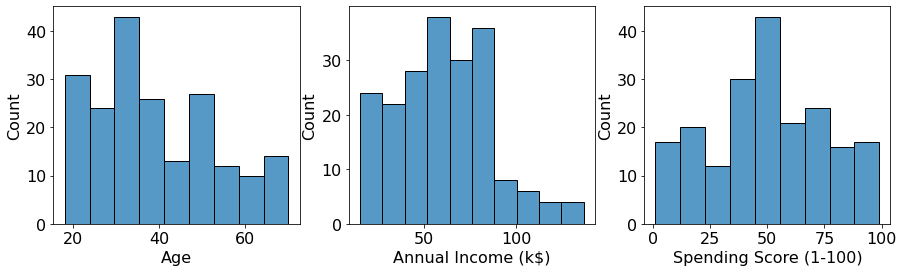

In [22]:
import seaborn as sns
fig,axes=plt.subplots(1,3,figsize=(15,4))
sns.histplot(data=dat,x='Age',ax=axes[0])
sns.histplot(data=dat,x='Annual Income (k$)',ax=axes[1])
sns.histplot(data=dat,x='Spending Score (1-100)',ax=axes[2]);

## 2. Clustering k-means


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dat_sc=scaler.fit_transform(dat)
dat_sc

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

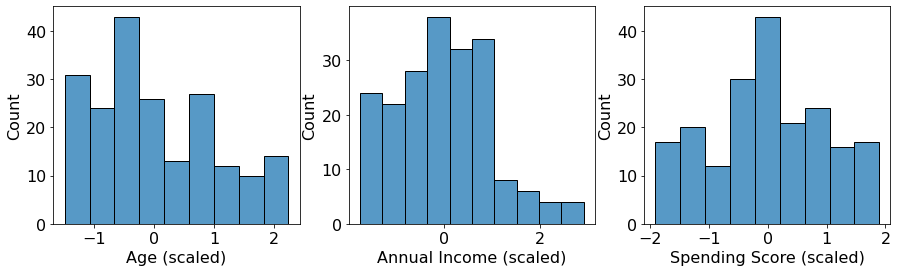

In [31]:
import seaborn as sns
fig,axes=plt.subplots(1,3,figsize=(15,4))
sns.histplot(data=dat_sc[:,0],ax=axes[0])
axes[0].set(xlabel='Age (scaled)')

sns.histplot(data=dat_sc[:,1],ax=axes[1])
axes[1].set(xlabel='Annual Income (scaled)')

sns.histplot(data=dat_sc[:,2],ax=axes[2])
axes[2].set(xlabel='Spending Score (scaled)');

In [32]:
from sklearn.cluster import KMeans, AgglomerativeClustering

#variables normalizadas: dat_sc

nclusters=3 #número predefinido de clusters

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=nclusters)

# Fijar semilla random para reproducibilidad
np.random.seed(1234)

# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(dat_sc)

In [33]:
kcls

KMeans(n_clusters=3)

In [34]:
#etiquetas de cada observacion
#labels=kcls.labels_

labels=kmeans.predict(dat_sc) 
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1], dtype=int32)

In [35]:
#centroides de clusters
centers=kcls.cluster_centers_
print(centers.shape)
print(centers)

(3, 3)
[[ 0.8916814   0.04741398 -0.62080368]
 [-0.43033758  1.02223317  1.15593564]
 [-0.93381128 -0.67979753  0.1338202 ]]


In [36]:
centers_i = scaler.inverse_transform(centers)
centers_i

array([[51.27472527, 61.8021978 , 34.20879121],
       [32.85365854, 87.34146341, 79.97560976],
       [25.83823529, 42.75      , 53.64705882]])

## 3. Método del codo.

¿Cuál es el número adecuado de clusters a generar?


In [37]:
inertia=[]
kmax=20
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(dat_sc)

    print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)
    

1 599.9999999999999
2 389.38618895643714
3 295.4562449213557
4 205.22514747675913
5 168.2475801755683
6 133.88887021131023
7 117.01155455889815
8 104.1245290759907
9 93.36295029647951
10 81.96348333376193
11 72.07485830409432
12 67.08557523262077
13 63.69336791477514
14 60.249055244352306
15 56.27877453146593
16 53.63927325851598
17 51.42017149625799
18 49.90665416016334
19 47.617181526686004


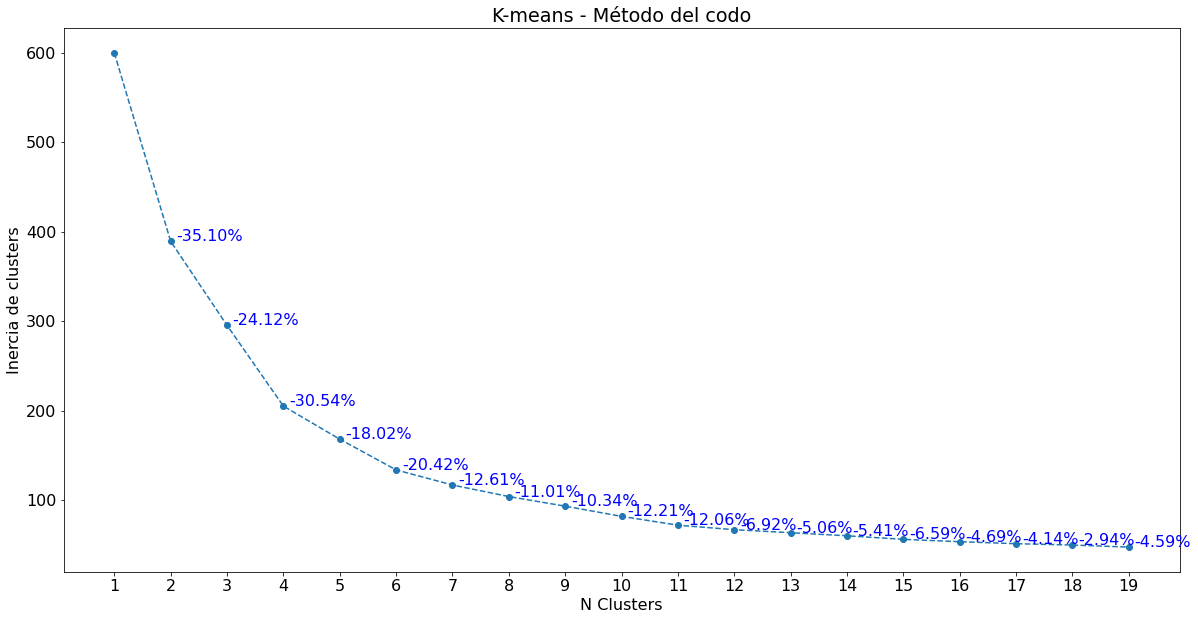

In [63]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

## 4. Clustering k-means: versión final


De acuerdo al análisis de inercia de clusters para valores de $k$, es razonable realizar un clustering con $k=5$ o 6. Una vez definido este parámetro, reentrenamos el modelo y analizamos los perfiles de clientes. La selección final de $k$ tambén depende del análisis que se haga de los perfiles de los clusters.

In [38]:
k=6

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=k,random_state=0)


# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(dat_sc)


In [39]:
#Agregamos los labels de clusters como una nueva columna en el dataset original
dat['kcls_labels']=kcls.labels_

In [40]:
#centroides de clusters
centers=kcls.cluster_centers_
centers_i = scaler.inverse_transform(centers)

centers_i

array([[27.        , 56.65789474, 49.13157895],
       [56.33333333, 54.26666667, 49.06666667],
       [32.69230769, 86.53846154, 82.12820513],
       [41.26470588, 88.5       , 16.76470588],
       [45.52380952, 26.28571429, 19.38095238],
       [25.        , 25.26086957, 77.60869565]])

### Visualización de los clusters.

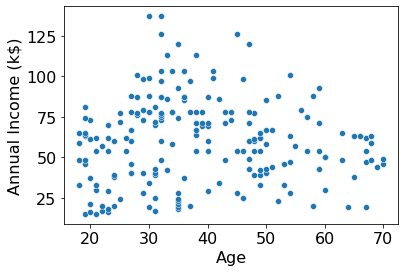

In [58]:
sns.scatterplot(data=dat,x='Age',y='Annual Income (k$)');


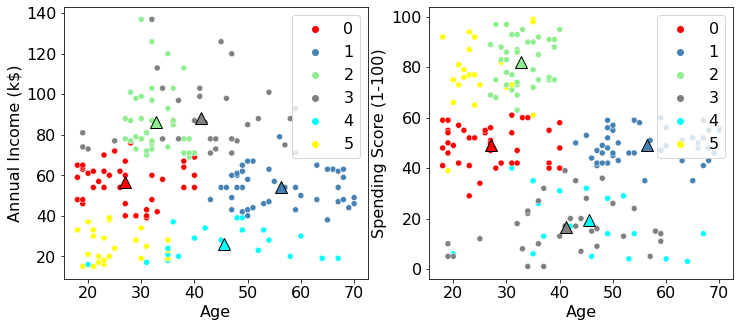

In [48]:
from matplotlib.colors import ListedColormap
k=5
fig=plt.figure(figsize=(12,5))
colors = ('red', 'steelblue', 'lightgreen', 'gray', 'cyan','yellow')
cmap = ListedColormap(colors)

#Age vs. income
ax1=fig.add_subplot(121)
sns.scatterplot(data=dat,x='Age',y='Annual Income (k$)',hue='kcls_labels',palette=cmap,ax=ax1)

for i in range(k):
    ax1.plot(centers_i[i,0],centers_i[i,1],color=colors[i],marker='^',markersize=12,mec='k')

ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income (k$)')
ax1.legend()

#Age vs. score
ax2=fig.add_subplot(122)
sns.scatterplot(data=dat,x='Age',y='Spending Score (1-100)',hue='kcls_labels',palette=cmap,ax=ax2)

for i in range(k):
    ax2.plot(centers_i[i,0],centers_i[i,2],color=colors[i],marker='^',markersize=12,mec='k')

ax2.set_xlabel('Age')
ax2.set_ylabel('Spending Score (1-100)')
ax2.legend();


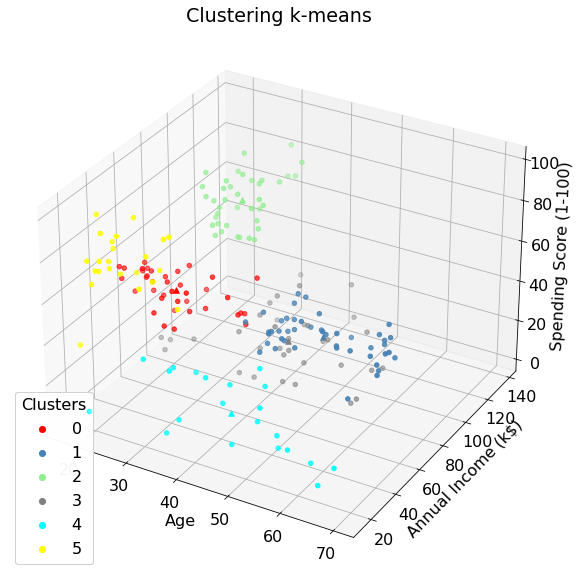

In [53]:
from mpl_toolkits.mplot3d import Axes3D 
k=5
fig=plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
fig.tight_layout
ax = fig.add_subplot(111, projection='3d')

scatter=ax.scatter(dat['Age'],dat['Annual Income (k$)'],dat['Spending Score (1-100)'],c=dat['kcls_labels'],cmap=cmap)
ax.set_title('Clustering k-means')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

for i in range(k):
    ax.scatter(centers_i[i,0],centers_i[i,1],centers_i[i,2],c=colors[i],marker='^',s=30)
    
# produce a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(),loc="lower left", title="Clusters")
ax.add_artist(legend)

plt.show()

### ¿Cuál es el perfil de cada cluster de clientes?

In [49]:
# Agrupar datos por cluster, y contar observaciones
ksizes = dat.groupby('kcls_labels').size()
ksizes

kcls_labels
0    38
1    45
2    39
3    34
4    21
5    23
dtype: int64

In [66]:
# Agrupar datos por cluster (label), y calcular la media de las variables usadas para el clustering 
kmeans = dat.groupby('kcls_labels',as_index=False).mean()
kmeans.T

,0,1,2,3,4,5
kcls_labels,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
Age,27.000000,56.333333,32.692308,41.264706,45.523810,25.000000
Annual Income (k$),56.657895,54.266667,86.538462,88.500000,26.285714,25.260870
Spending Score (1-100),49.131579,49.066667,82.128205,16.764706,19.380952,77.608696
kcls_labels_hc,0.000000,0.955556,2.000000,2.529412,4.000000,4.739130


In [67]:
kmeans

,kcls_labels,Age,Annual Income (k$),Spending Score (1-100),kcls_labels_hc
0,0,27.000000,56.657895,49.131579,0.000000
1,1,56.333333,54.266667,49.066667,0.955556
2,2,32.692308,86.538462,82.128205,2.000000
3,3,41.264706,88.500000,16.764706,2.529412
4,4,45.523810,26.285714,19.380952,4.000000
5,5,25.000000,25.260870,77.608696,4.739130


<AxesSubplot:xlabel='kcls_labels', ylabel='Spending Score (1-100)'>

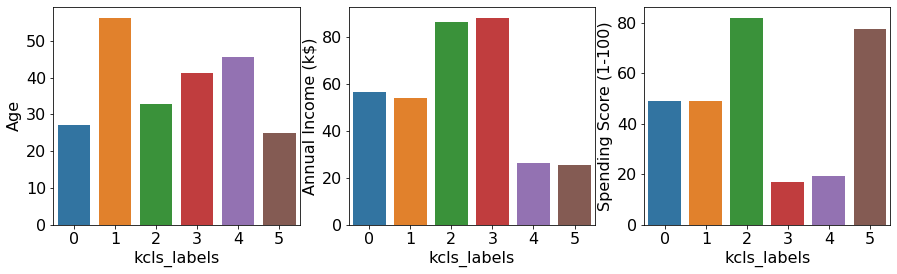

In [85]:
fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.barplot(data=kmeans,y='Age',x='kcls_labels',ax=axes[0])
sns.barplot(data=kmeans,y='Annual Income (k$)',x='kcls_labels',ax=axes[1])
sns.barplot(data=kmeans,y='Spending Score (1-100)',x='kcls_labels',ax=axes[2])

- Cluster 0: 
- Cluster 1: 
- Cluster 2: 
- Cluster 3: 
- Cluster 4: 
- Cluster 5:

## 5. Clustering aglomerativo.

In [75]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
labels_hc = hc.fit_predict(dat_sc)

In [76]:
#Agregamos los labels de clusters como una nueva columna en el dataset original
dat['kcls_labels_hc']=labels_hc

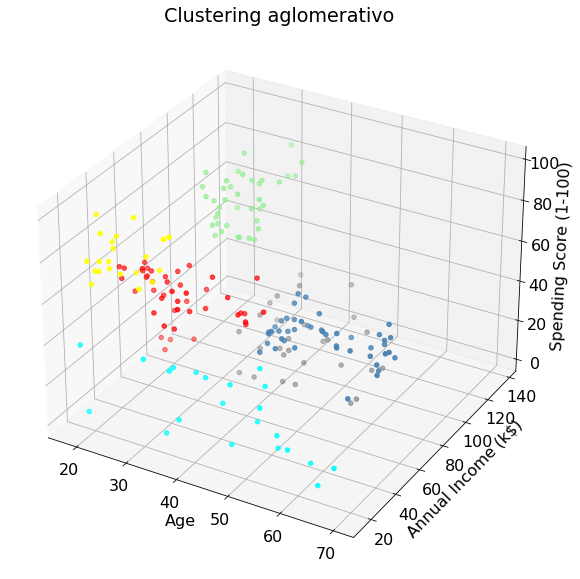

In [77]:
from mpl_toolkits.mplot3d import Axes3D 

fig=plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
fig.tight_layout
ax = fig.add_subplot(111, projection='3d')

scatter=ax.scatter(dat['Age'],dat['Annual Income (k$)'],dat['Spending Score (1-100)'],c=dat['kcls_labels_hc'],cmap=cmap)
ax.set_title('Clustering aglomerativo')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')


    
# produce a legend with the unique colors from the scatter
#legend = ax.legend(*scatter.legend_elements(),loc="lower left", title="Clusters")
#ax.add_artist(legend)

plt.show()

El dendograma es un diagrama que muestra las relaciones jerárquicas entre objetos, y es típicamente un output de algoritmos de clustering jerárquico. El dendograma permite visualizar la mejor forma de asignar observaciones a clusters. 

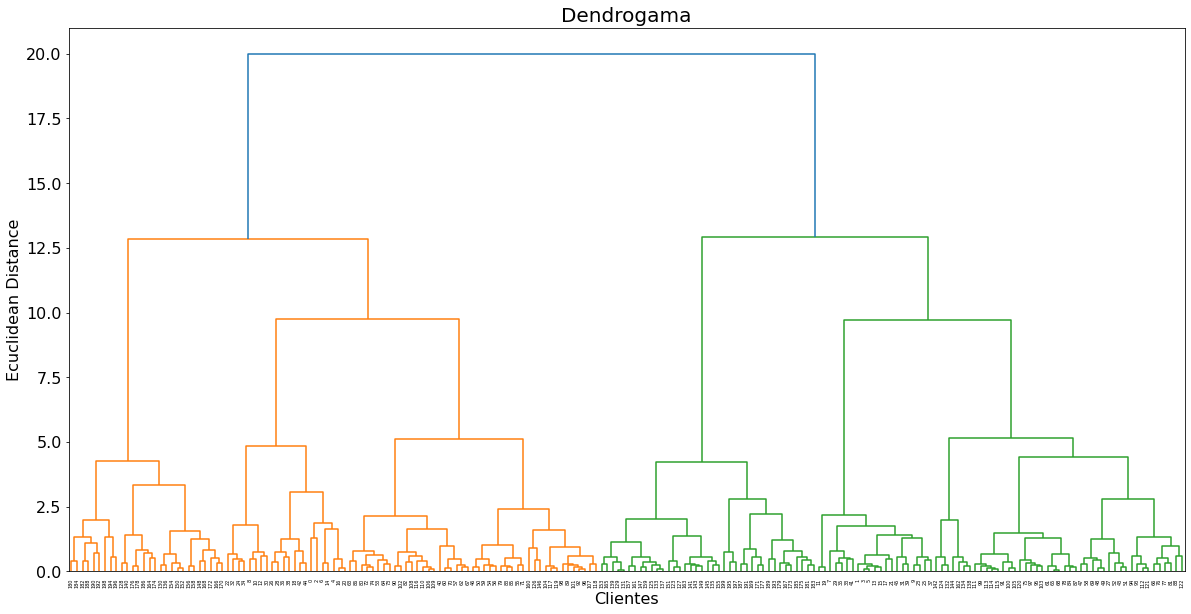

In [57]:
import scipy.cluster.hierarchy as sch

fig=plt.figure(figsize=(20,10), facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)

dendrogram = sch.dendrogram(sch.linkage(dat_sc, method = 'ward'),ax=ax)
plt.title('Dendrogama', fontsize = 20)
plt.xlabel('Clientes')
plt.ylabel('Ecuclidean Distance')
plt.show()